In [2]:
import keras 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
#test_data = pd.read_csv('test_data_RNN.csv')

In [3]:
data_folder = 'data'
test_data = pd.read_csv(os.path.join(data_folder, 'test_data_RNN.csv'))

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
testX_df1 = test_data.iloc[:, :-1]
testY_df1 = test_data.iloc[:, -1]
print(testX_df1.shape)
print(testY_df1.shape)
# Convert trainX_df and trainY_df back to arrays
re_testX1 = scaler.fit_transform(testX_df1.to_numpy())
print(re_testX1.shape)
scaled_testY1 = scaler.fit_transform(testY_df1.to_numpy().reshape(-1, 1))
scaled_testX1 = re_testX1.reshape(re_testX1.shape[0], 3, 4)

(377, 12)
(377,)
(377, 12)


In [5]:
scaled_testX1.shape

(377, 3, 4)

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('models/20988627_21051268_21049384_RNN.h5')

12/12 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Scaled Prediciton')

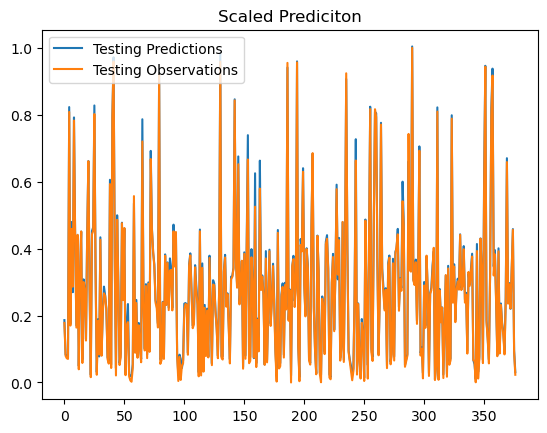

In [22]:
# TESTING PREDICTIONS

test_predictions = loaded_model.predict(scaled_testX1).flatten()

plt.plot( test_predictions)
plt.plot( scaled_testY1)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('Scaled Prediciton')

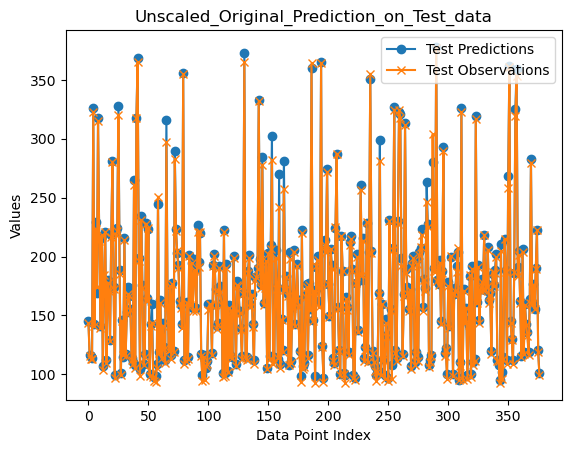

In [23]:
import matplotlib.pyplot as plt
test_predictions_unscaled = scaler.inverse_transform(test_predictions.reshape(-1,1))
final_test_y_unscaled = scaler.inverse_transform(scaled_testY1)



# Assuming you already have 'train_predictions' and 'final_train_y' as arrays containing the training predictions and observations, respectively.

# Create a scatter plot for training predictions and observations
plt.plot(range(len(test_predictions)), test_predictions_unscaled, label='Test Predictions', marker='o')
plt.plot(range(len(scaled_testY1)), final_test_y_unscaled, label='Test Observations', marker='x')

# Add legend and labels
plt.legend()
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title("Unscaled_Original_Prediction_on_Test_data")

plt.show()




In [24]:
 #Evaluate the model on the test data
test_loss, test_mae = loaded_model.evaluate(scaled_testX1, scaled_testY1)

print(f'Loss: {test_loss:.4f} - Mean Absolute Error: {test_mae:.4f}')

12/12 [==============================] - 0s 9ms/step - loss: 2.2640e-04 - mean_absolute_error: 0.0097
Loss: 0.0002 - Mean Absolute Error: 0.0097
